In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load, dump
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import BisectingKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
X, y = load('../../preprocess/clustering_data.joblib')

In [3]:
X.head()
scaler = MinMaxScaler()

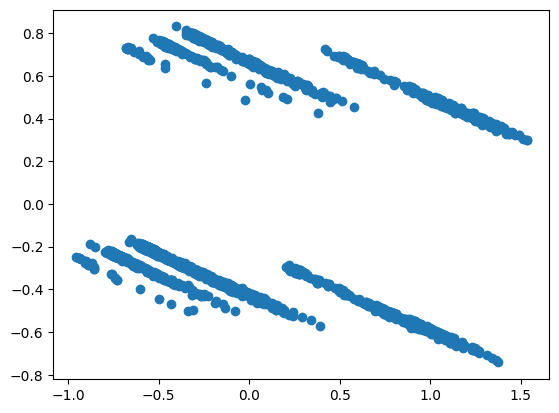

In [4]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

_ = plt.scatter(X_pca[:, 0], X_pca[:, 1])
pca_names = [f'Component {i}' for i in range(pca.n_components_)]

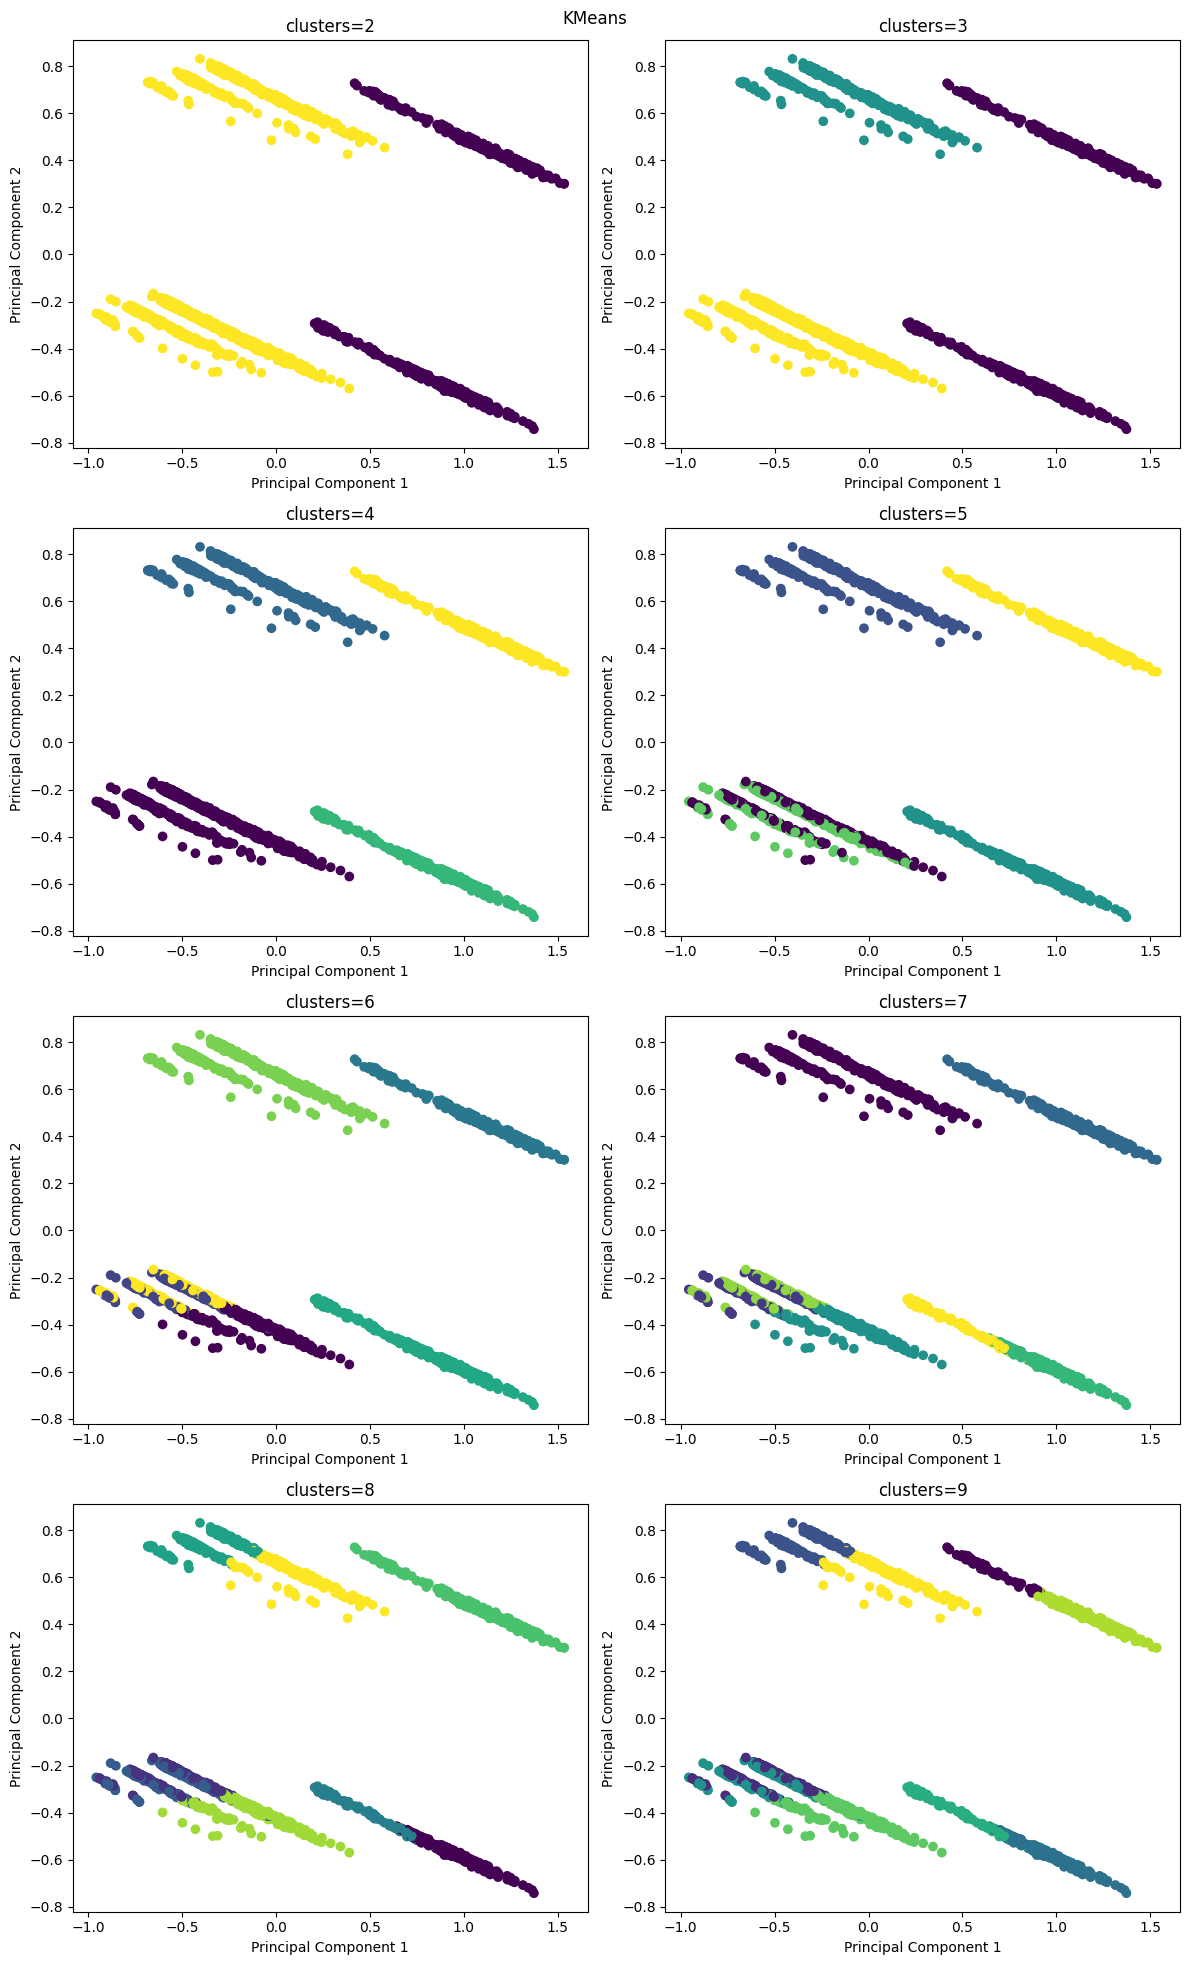

In [5]:
ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=55)
    kmeans.fit(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
    ax.set_title(f"clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()

In [6]:
silhouettes

[0.31097629894827766,
 0.27511768840776096,
 0.2903888889345253,
 0.21643591966815848,
 0.21294132157983836,
 0.20917074799620933,
 0.19989213698135416,
 0.20049411790551191]

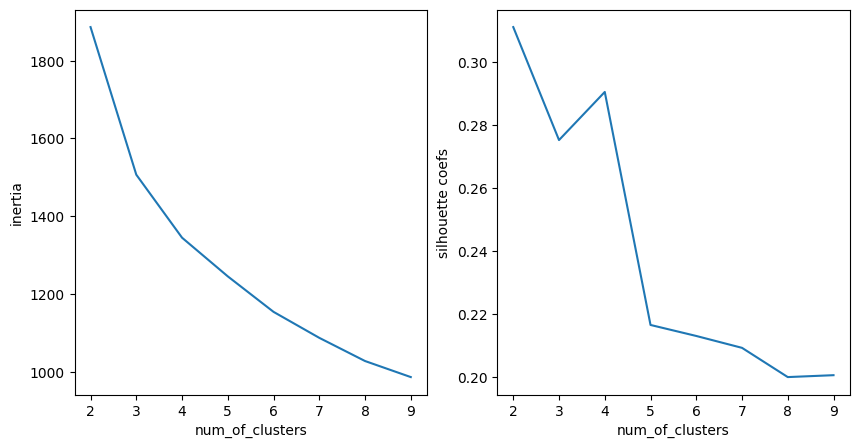

In [7]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, sse)
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes)
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')

plt.show()

In [8]:
kmeans= KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [9]:
silhouette = silhouette_score(X, kmeans.labels_)
silhouette

0.31097629894827766

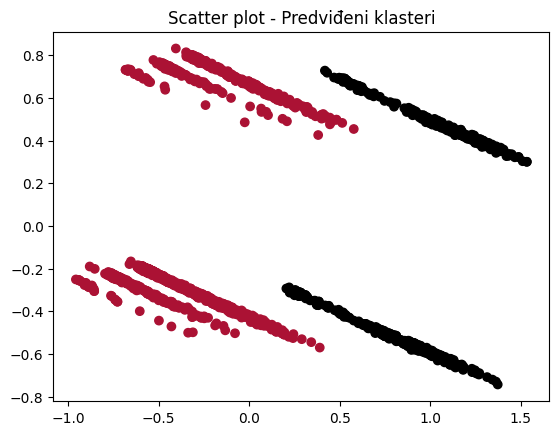

In [10]:
labels = kmeans.labels_

color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in labels]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors ,label=colors)

plt.title('Scatter plot - Predviđeni klasteri')
plt.show()

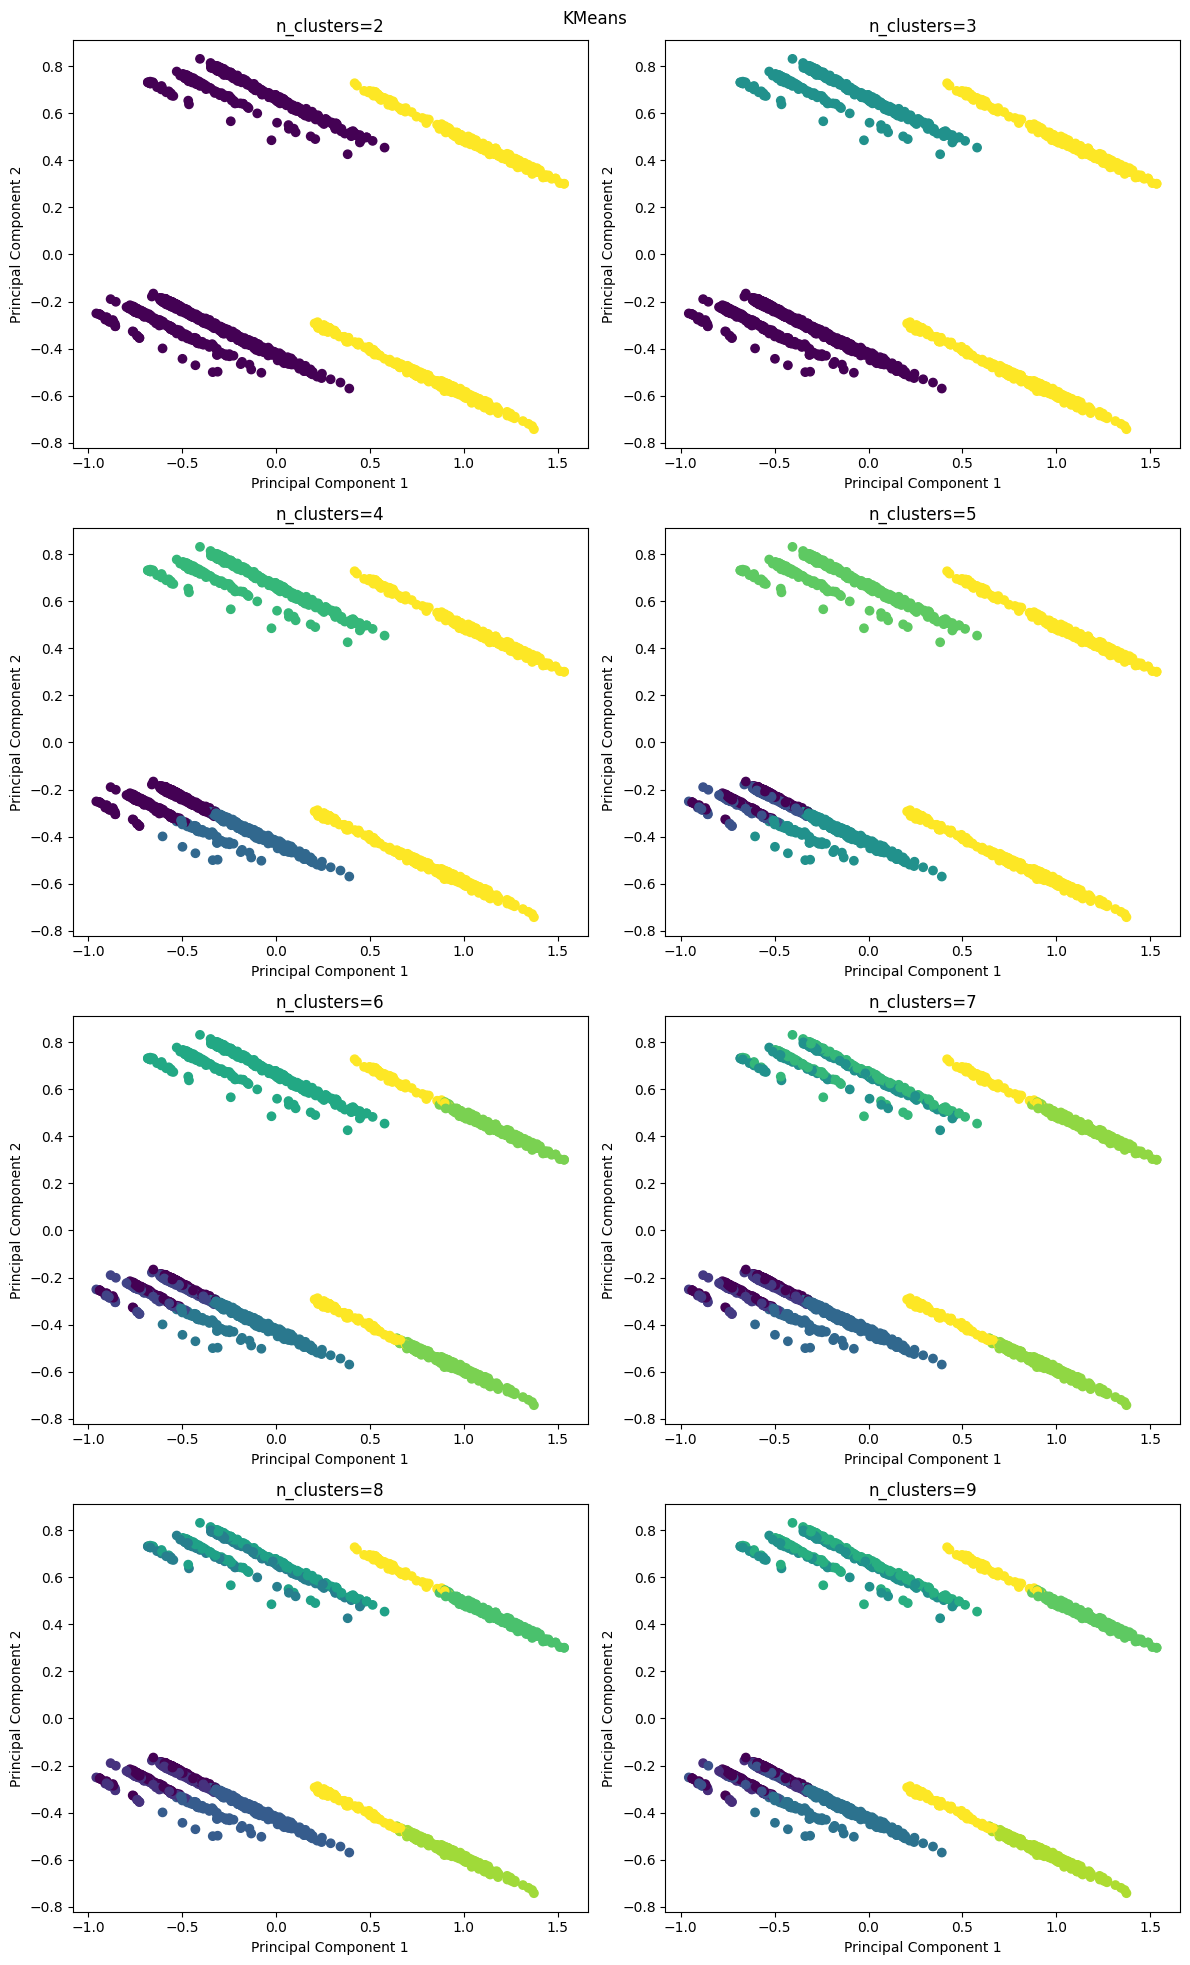

In [11]:
sse_bisecting = []
silhouettes_bisecting = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    bkmeans = BisectingKMeans(n_clusters=k, bisecting_strategy='largest_cluster', random_state=55)
    bkmeans.fit(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=bkmeans.labels_)
    ax.set_title(f"n_clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse_bisecting.append(bkmeans.inertia_)
    silhouettes_bisecting.append(silhouette_score(X, bkmeans.labels_))

plt.tight_layout()
plt.show()

In [12]:
silhouettes_bisecting

[0.31097629894827766,
 0.27511768840776096,
 0.21039730924602112,
 0.18061124385471536,
 0.18872198831893766,
 0.1710312901553491,
 0.18877515681870352,
 0.17575847809439357]

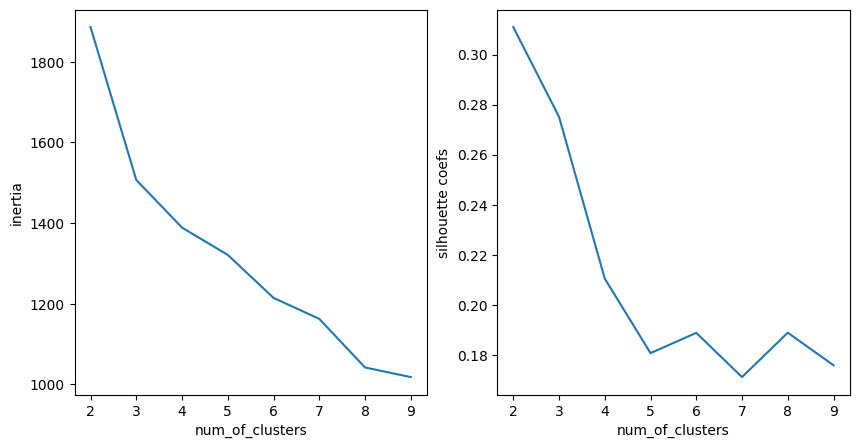

In [13]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, sse_bisecting)
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes_bisecting)
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')

plt.show()

In [14]:
bkmeans = BisectingKMeans(n_clusters=2, bisecting_strategy='largest_cluster', random_state=55)
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=2,
                random_state=55)

In [15]:
silhouette2 = silhouette_score(X, bkmeans.labels_)
silhouette2

0.31097629894827766

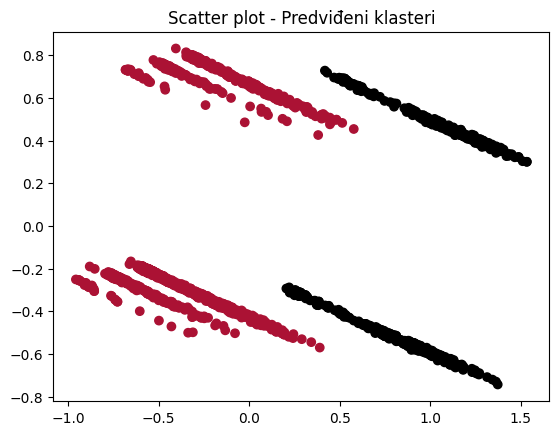

In [16]:
labels = bkmeans.labels_

color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in labels]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, label=colors)

plt.title('Scatter plot - Predviđeni klasteri')
plt.show()

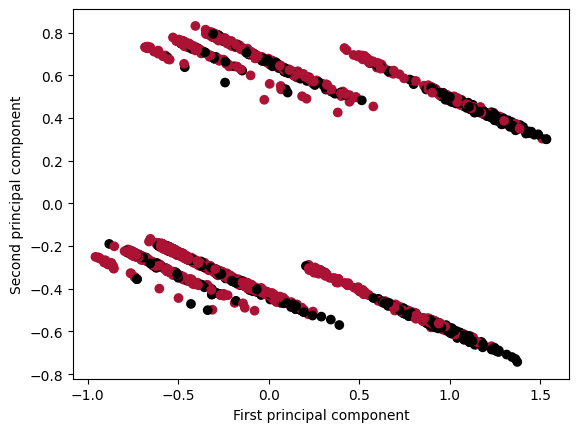

In [17]:
color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in y]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

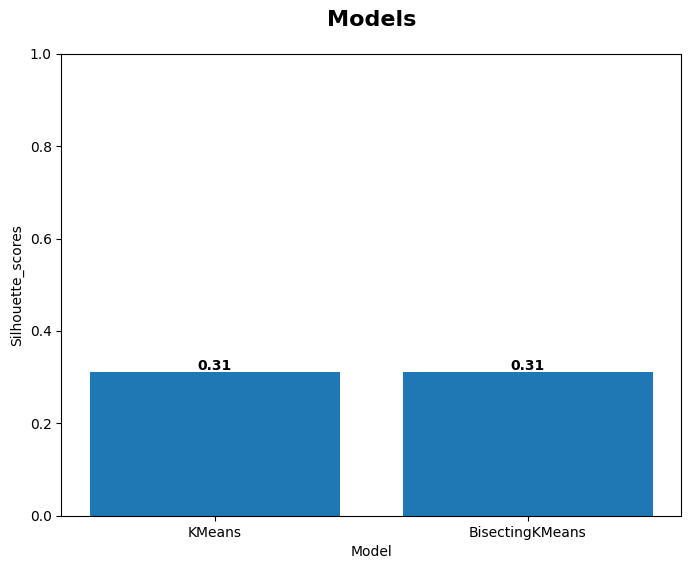

In [18]:
models = ['KMeans', 'BisectingKMeans']

silhouette_scores = [silhouette,silhouette2]
plt.figure(figsize=(8, 6))
bars = plt.bar(models, silhouette_scores)

plt.xlabel('Model')
plt.ylabel('Silhouette_scores')
plt.title('Models',fontsize=16, fontweight='bold', pad=20)
plt.ylim([0, 1])
for i, v in enumerate(silhouette_scores):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', color='black', fontweight='bold')
plt.show()

In [19]:
score=[]
def clustering_score(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score

In [20]:
kmeansscore=clustering_score(y, kmeans.labels_)
score.append(kmeansscore)
kmeansscore

69.80708838043967

In [21]:
bkmeansscore=clustering_score(y, bkmeans.labels_)
score.append(bkmeansscore)
bkmeansscore

69.80708838043967

In [22]:
clustering_score(kmeans.labels_, bkmeans.labels_)

100.0